[<img align="left" width="140px" src="https://storage.googleapis.com/static.drivetrainhub.com/img/dh_logo_text_217x80.png"/>](https://drivetrainhub.com)

<div align="right">© 2020 Drivetrain Hub LLC</div>

# Geometry / Planetary Gears
---

**Authors**:  [Chad Glinsky](https://www.linkedin.com/in/chad-glinsky-a1840b13/)

**Description**:  Review of geometry for planetary gears and planetary gear meshes.

## Table of Contents

1. [Introduction](#Introduction)
1. [Standard Planetary](#Standard-Planetary)
    1. [Nomenclature](#Nomenclature-1)
    1. [Ratios](#Ratios)
    1. [Constraints](#Constraints)
    1. [Example - Spur](#Standard-Example-1)
    1. [Example - Helical](#Standard-Example-2)
1. [Compound Planetary](#Compound-Planetary)
    1. [Nomenclature](#Nomenclature-2)
    1. [Constraints](#Constraints)
    1. [Example - Spur](#Compound-Example-1)
    1. [Example - Helical](#Compound-Example-2)
1. [References](#References)

#### Notebook imports and settings

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi, radians, degrees, isclose, sqrt, asin, floor, ceil
import numpy as np
import pandas as pd
import qgrid
from IPython.display import display, HTML

# notebook modules
import planetary

# settings
FIGSIZE = (6, 6)  # size of plots
plt.rcParams.update({'font.size': 12})  # set default font size

In [54]:
# DEVELOPMENT USE: %autoreload 1
# PRODUCTION USE: %autoreload 0
%load_ext autoreload
%autoreload 1
%aimport planetary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\LaTeX$ commands
$\newcommand{\inv}{\text{inv }}$
$\newcommand{\mm}{\text{mm}}$
$\newcommand{\deg}{^\circ}$
$\newcommand{\degt}{\text{deg}}$
$\newcommand{\perinch}{\text{in}^{-1}}$
$\newcommand{\mps}{\text{m/s}}$
$\newcommand{\rpm}{\text{rpm}}$

## Introduction

The geometry of planetary geartrain layouts is reviewed here.  Planetary geartrains can be configured in several ways, with the most common architectures reviewed here.  Attractive characteristics of planetary geartrains include:

- Mechanical power is transferred between concentric bodies (ring, sun, carrier)
- Power density is high, providing great mechanical power in a small package
- Multiple gear meshes act on central bodies, with self-centering tendencies
- Planet gears may precess with the carrier reference frame
- Cylindrical involute gears are used to transmit motion
- Multiple power inputs or outputs can be defined

The visualization of a planetary geartrain clearly demonstrates its unique geometric characteristics.

<img src="./img/drivetrainhub_planetary_spur_gears_2d.png" alt="Spur planetary geartrain" style="max-height: 350px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Planetary geartrain modeled with <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>


Most commonly, planetary geartrains have a sun gear (yellow), ring gear (blue), and multiple planet gears (orange) on a carrier (gray). Spur or helical gears are used for a planetary gearset, with each type having advantages.  This notebook reviews the unique geometric attributes of planetary gears and their significance to planetary gear mesh operation.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>The assembly of a planetary geartrain is dependent on various geometric attributes, such as tooth counts.</b>
    <br><br>
    The various conditions that must be satisfied for a planetary geartrain to successfully assemble are reviewed in this notebook.  To understand the geometry of the spur or helical gears that makeup a planetary geartrain, see the respective notebooks on gear geometry.
</div>

## Standard Planetary

This section reviews the design layout of standard planetary geartrains, i.e. planetaries with a single sun, ring, and set of planets like shown in the image below.  Working examples are provided for spur and helical planetary geartrains.

*TODO replace with 4-planet image*

<img src="./img/drivetrainhub_planetary_helical_gears.png" alt="Helical planetary geartrain" style="max-height: 350px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Standard planetary modeled with <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

### Nomenclature <a name="Nomenclature-1"></a>

This table provides a set of parameters commonly used to define the geometry of planetary geartrains.

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$m_n$</td>
        <td style="text-align:left">Normal module</td>
    </tr>
    <tr>
        <td style="text-align:left">$z$</td>
        <td style="text-align:left">Number of teeth</td>
    </tr>
    <tr>
        <td style="text-align:left">$\beta$</td>
        <td style="text-align:left">Helix angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_a$</td>
        <td style="text-align:left">Tip diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_t$</td>
        <td style="text-align:left">Transverse pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_w$</td>
        <td style="text-align:left">Pitch diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$a$</td>
        <td style="text-align:left">Center distance</td>
    </tr>
    <tr>
        <td style="text-align:left">$l$</td>
        <td style="text-align:left">Planet distance</td>
    </tr>
    <tr>
        <td style="text-align:left">$N$</td>
        <td style="text-align:left">Number of planets</td>
    </tr>
</table>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    For a planetary geartrain, the subscripts <sub>$1$</sub>, <sub>$2$</sub>, and <sub>$3$</sub> are used for the sun, planet, and ring gears, respectively.
</div>

### Ratios

When designing a planetary geartrain, a transmission ratio is typically used to define a target or goal.  The design space is largely determined from the target ratio, so an allowable deviation is often used depending on the application requirements.

*TODO review the equations for transmission ratios*

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    To learn more about the fundamentals of rotational kinematics and how gears transfer motion, refer to our kinematics notebook.  The present notebook is focused more on planetary design layouts.
</div>

In [55]:
# NOTE: Negative sign convention is used for number of ring gear teeth, z3.

def std_ratio_base(z1, z3):
    """Compute the base transmission ratio between sun and ring with the carrier constrained to ground."""
    
    return z3 / z1


def std_ratio_1v(ratio_base):
    """Compute the transmission ratio between sun and carrier with the ring gear constrained to ground."""
    
    return 1 - ratio_base


def std_ratio_3v(ratio_base):
    """Compute the transmission ratio between the carrier and ring with the sun gear constrained to ground."""
    
    return ratio_base / (ratio_base - 1)

### Constraints

To design a *valid* planetary geartrain, one that can be assembled and operate in real-world applications, multiple constraints must be adhered to.  All the constraints relate to geometrical relationships of planetary geartrains.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <strong>Geometric layouts are used to study the feasible design space for planetary geartrains.</strong>
    <br><br>
    As will be shown, only certain combinations of tooth counts, planet count, and planet spacing are possible.
</div>

#### Center Distance

The geometric condition that requires the center distance for the sun-planet and planet-ring gear meshes to be the same is obvious when illustrated.  The equation to express this relationship can be expanded as a function of the working pitch diameters:

$$\lvert a_{12} \rvert = \lvert a_{23} \rvert$$

$$\lvert d_{w1} + d_{w2} \rvert = \lvert d_{w2'} + d_{w3} \rvert$$

where $d_{w2'}$ specifically refers to the working pitch diameter of the planet-ring gear mesh, which may differ from the sun-planet mesh due to profile shifts, tooth counts, and center distance differing from nominal (a condition with zero profile shift or backlash).  Below illustrates a layout diagram for a 4-planet geartrain:

<img src="./img/drivetrainhub_planetary_layout_4p.svg" alt="Planetary layout diagram" style="max-height: 400px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Planetary layout diagram of 4-planet geartrain</p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <strong>Analogous to an idler gear, the planet gear has no effect on the planetary transmission ratios.</strong>
    <br><br>
    When considering the detailed tooth form of the meshing gears, this means multiple values of planet tooth count are possible for a given design.  The design space is somewhat complicated by this, but it is more applicable to the detailed tooth design, so does not require immediate consideration.
</div>

In [56]:
def reference_planet_size(d1, d3):
    """Compute the reference planet size; diameter or tooth counts may be used.  Actual planets may differ."""
    
    return (abs(d3) - d1) / 2

#### Planet Interference

Upon viewing the enveloping geometry, notice the condition of planet-to-planet interference must be considered.  Clearance must exist between the tip diameters of each planet.  The equation to express this constraint is:

$$l > d_{a2}$$

where $l$ is the center distance between planets, expressed as:

$$l = 2a\sin\left(\frac{\pi}{N}\right)$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    In the conceptual design stage, tip diameters are usually unknown, so the pitch diameter may be used as an initial approximation.
</div>

In [57]:
def get_max_planets(tip_diameter_planet, center_distance):
    """Compute the maximum number of planets to avoid interference."""
    
    return floor(pi / (asin(tip_diameter_planet / (2 * center_distance))))

#### Meshing Teeth

Despite a given enveloping diagram appearing as a valid design, remember that an integer number of teeth is required for all the gears.  Adding to this requirement, the teeth of each planet must mesh with both the sun and ring.  Determining valid conditions for teeth to mesh depends on the tooth counts, number of planets, and planet spacing.

To understand this requirement, let's imagine assembling a planetary geartrain.  First, position the sun at the origin with any angle of rotation.  Next, add the first planet to a desired carrier position, rotating its teeth to mesh with the sun.  Then, position the ring at the origin, rotating its teeth to mesh with the planet.  Now, imagine adding the second planet somewhere on the carrier, not being allowed to rotate the sun or ring.  Only certain carrier positions will allow the second planet to mesh with both the sun and ring.

##### Equal Spacing

For *equally-spaced planets*, the following equation is used to identify valid meshing conditions for a given number of planets and tooth counts:

$$k = \frac{z_1 - z_3}{N}$$

where $k$ must be an integer for the gears to mesh.

##### Unequal Spacing

It is also possible for the gears to mesh with *unequal planet spacing*.  In such cases, the smallest angular unit pertaining to the allowable planet positions is used to find the planet positions nearest equal spacing.  This unit angle of planet position, or so-called *tick angle*, may be calculated as:

$$\hat{\theta} = \frac{2 \pi}{z_1 - z_3}$$

Typically, unuequal spacing is only used in 4-planet geartrains where the planet gears can be positioned with *diametrically-opposed* spacing.  Sometimes this is called an *X* configuration.  A diametrically-opposed design is allowed if the remainder of $k$ is 0.5.  Designs capable of being equally-spaced can also be modified to be diametrically-opposed.

In [58]:
# NOTE: Negative sign convention is used for number of ring gear teeth, z3.

def get_planet_tick_angle(z1, z3):
    """Compute the unit angle to satisfy the planet meshing conditions."""
    
    return 2 * pi / (z1 - z3)


def get_planet_equal_ticks(z1, z3, number_of_planets):
    """Compute the number of tick angles that correspond to equal planet spacing.  Must be integer to mesh."""
    
    return (z1 - z3) / number_of_planets


def allows_equally_spaced(equal_ticks):
    """Check if equally spaced planets are allowed based on the tick count required for equal spacing."""
    
    return isclose(equal_ticks, round(equal_ticks))


def allows_diametrically_opposed(equal_ticks):
    """Check if diametrically opposed planet spacing is allowed based on the ticks required for equal spacing."""
    
    return isclose(equal_ticks % 1, 0.5)

#### Mesh Phasing

Once the geometric conditions are met to ensure a valid planetary geartrain can be assembled, it is also of interest to consider the phasing of the planetary gear meshes.  Phasing refers to the cyclic behavior of multiple gear meshes with the same frequency.

Three types of planetary phasing exist for nominal conditions.
1. In-phase
1. Sequential-phase
1. Counter-phase

Before explaining each phasing type, it must understood that phasing specifically refers to the phase angle for the harmonics of gear mesh excitation caused by imperfect conjugate action, commonly referred to as transmission error.  These excitations are caused by numerous things, including manufacturing and assembly errors, but also due to the deflection of gear teeth under operating loads.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <strong>Gear mesh excitations can be viewed as a series of sinusoidal signals, called harmonics, each with an amplitude and phase angle.</strong>
    <br><br>
    Fourier transform is used to analyze a time signal as a series of sinusoids, useful for harmonic analysis.
</div>

The phasing classification for a planetary geartrain is based on the first harmonic of its gear mesh excitations.  Higher harmonics may have different phasing.  The following equation can be used to determine phasing with *equally-spaced planets*:

$$k_\phi = |z_3| \bmod N$$

In particular, the phasing is of interest to understand which gear mesh excitations reinforce or cancel in the system.  Excitation reinforcements and cancellations are studied for the following summed components:

1. Torques
1. Axial forces, i.e. thrusts (helical only)
1. Radial forces
1. Moments out-of-plane (helical only)

##### In-Phase

*In-phase* refers to having the same phase angle for each gear mesh.  In-phase planetaries have reinforced torques and thrusts but cancelled radial forces and moments.  The condition for in-phase is:

$$k_\phi = 0$$

##### Sequential-Phase

*Sequential-phase* refers to having equally separated phase angles for subsequent gear meshes.  Sequential-phase planetaries have cancelled torques and thrusts but reinforced radial forces and moments.  The condition for sequential-phase:

$$k_\phi = 1, N-1$$

##### Counter-Phase

*Counter-phase* refers to having opposite phase angles for opposing planets.  Counter-phase planetaries have all summed components of excitation cancelled.  The condition for counter-phase is:

$$k_\phi = 2, 3, \dots, N-2$$


##### Mixed-Phase

*Mixed-phase* refers to having a combination of phasing types.  This can only occur with *unequally-spaced planets*, as found in diametrically-opposed designs.  In such cases, the angular unit between ring gear teeth, i.e. transverse pitch angle, is used along with planet position to determine the phasing of each gear mesh.

$$\psi_{t3} = \frac{2 \pi}{z_3}$$

$$k_{\theta i} = \frac{\theta_i}{\psi_{t3}}$$

where $\theta_i$ is the angular position of the $i^\text{th}$ planet.

*TODO derive equation to compute the gear mesh phasing of the ith planet (required for unequally-spaced designs)*

<img src="./img/gears-app_planetary-phasing-compare.png" alt="Compare planetary phasing types" style="max-height: 350px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Planetary geartrains of phasing types modeled in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <strong>Perfect planetary phasing conditions are not observed in real-world conditions.</strong>
    <br><br>
    Errors caused by manufacturing, assembly, and operation can cause gear mesh phasing deviations and low frequency modulations that will lead to more vibration frequencies, increased vibrations, and undesireable noise characteristics.  Planetary phasing should be considered during the design-phase.
</div>

In [90]:
# FIXME DEV ONLY
zr = -52
zs = 18
N = 4

k_phi = abs(zr) % N
k = (zs - zr) / N

ring_tick = 2 * pi / abs(zr)
planet_tick = 2 * pi / (zs - zr)
tick_ratio = ring_tick / planet_tick  # X ring ticks per planet tick

theta2 = ceil(k) * 2 * pi / (zs - zr)
transverse_pitch_angle3 = 2 * pi / abs(zr)
k_theta3 = theta2 / transverse_pitch_angle3

print(k_phi, k)
print(degrees(theta2))
print(abs(zr) / N)
print(k_theta3)
print(degrees((k_theta3 % 1) * 2 * pi))

# TODO compute the phase angle of each gear mesh, i.e. based on the fraction of mesh cycle per planet position
# TODO report the sum of torques and forces

0 17.5
92.57142857142857
13.0
13.371428571428572
133.71428571428586


In [60]:
# NOTE: Sign convention for number of ring gear teeth is insignificant here.

def mod_phasing(z3, number_of_planets):
    """Modulo operation to compute planetary phasing."""
    
    return abs(z3) % number_of_planets


def is_in_phase(k_phi):
    """Check if planetary gear meshes are in-phase."""
    
    return k_phi == 0


def is_sequential_phase(k_phi):
    """Check if planetary gear meshes are sequential-phase."""
    
    return k_phi == 1 or k_phi == number_of_planets - 1


def is_counter_phase(k_phi):
    """Check if planetary gear meshes are counter-phase."""
    
    return k_phi == 2 or k_phi == 3 or k_phi == number_of_planets - 2


def candidate_phasing(z3, number_of_planets):
    """Return a string to signify the phasing type."""
    
    k_phi = mod_phasing(z3, number_of_planets)
    
    if is_in_phase(k_phi):
        s = 'I'
    elif is_sequential_phase(k_phi):
        s = 'S'
    elif is_counter_phase(k_phi):
        s = 'C'
    else:
        raise ValueError('Phasing not understood, review conditions.')
        
    return s
        
        
    return s

### Helical Gears

To extend the planetary design rules to helical gearing, we need to consider the helix angle and the transverse geometric properties.

*TODO explain things to consider for helical gears; maybe mention the overturning moments caused by helix angle.*

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    To learn more about the detailed attributes of helical gears, see our notebook for helical gears.
</div>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Spur Standard Planetary<a name="Standard-Example-1"></a></h3>
    <h4>GIVEN</h4>
    <ol>
        <li>Target tranmission ratio, with +/- range.</li>
        <li>Target ring gear size.</li>
        <li>Target planet count.</li>
    </ol>
    <h4>FIND</h4>Spur standard planetary designs that satisfy the input constraints.
    <h4>SOLUTION</h4>See below.
</div>

In [61]:
# HELPERS
# -------
cols_candidate = ['#', 'z1', 'z2', 'z3', 'ratio', 'N', 'space', 'phase', 'mn', 'CD']


def compute_candidate(i_candidate, z1, z3, number_of_planets, spacing):
    # compute actual ratio
    ratio_base = std_ratio_base(z1, z3)
    ratio_1v = std_ratio_1v(ratio_base)
    
    # compute reference planet teeth; actual tooth count may vary depending on profile shifts
    z2 = reference_planet_size(z1, z3)
    
    # compute tooth size and center distance
    mn = ring_pitch_dia_target / z3
    reference_center_distance = mn * (z1 + z2) / 2
    
    # compute phasing type
    phasing_type = candidate_phasing(z3, number_of_planets)
    
    return [i_candidate, z1, f'~{z2}', z3, round(ratio_1v, 2), number_of_planets, spacing, phasing_type, round(mn, 3), round(reference_center_distance, 3)]


def get_candidate_dict(candidate_row):
    return {key: val for key, val in zip(cols_candidate, candidate_row)}


def is_candidate_diametrally_opposed(candidate_dict):
    return candidate_dict['space'] == 'X'


def candidate_center_distance(candidate_dict):
    return candidate_dict['CD']

In [62]:
# INPUTS
# ------
ratio_1v_target = 4  # omega_sun / omega_carrier (fixed ring)
ratio_1v_delta = 0.03  # decimal percentage
ring_pitch_dia_target = -104
n_planets_target = 4

z3_min = -40
z3_max = -150

# NOTES
# -----
# Alternatively, we could constrain the tooth size, e.g. normal module, and allow envelope size to vary.

# EQUATIONS
# ---------
# i_1v = 1 - u
# ==> u = 1 - i_1v
# where u is the base ratio (fixed carrier)

# u = z3 / z1
# ==> z1 = z3 / u

# |z3| = z1 + 2 * z2
# ==> z2 = (|z3| - z1) / 2

# TARGET RATIOS
# -------------
ratio_1v_lower = (1 - ratio_1v_delta) * ratio_1v_target
ratio_1v_upper = (1 + ratio_1v_delta) * ratio_1v_target
base_ratio_target = 1 - ratio_1v_target
base_ratio_lower = 1 - ratio_1v_lower
base_ratio_upper = 1 - ratio_1v_upper

# TARGET DIAMETERS
# ----------------
sun_pitch_dia_target = ring_pitch_dia_target / base_ratio_target
planet_pitch_dia_target = reference_planet_size(sun_pitch_dia_target, ring_pitch_dia_target)
carrier_pitch_dia_target = sun_pitch_dia_target + planet_pitch_dia_target
center_distance_target = carrier_pitch_dia_target / 2

# MAX PLANETS
# -----------
# l > tip_diameter_planet
# where l = 2 * a * sin(pi / N) 
# where l is the center distance between planets
# ==> N = pi / (asin(l / (2 * a)) + 2 * pi

tip_diameter_planet = planet_pitch_dia_target  # CAUTION
number_of_planets_max = get_max_planets(tip_diameter_planet, center_distance_target)
number_of_planets = min([n_planets_target, number_of_planets_max])

if n_planets_target > number_of_planets_max:
    print(f"\x1b[31mWARNING: The number of planets is too high, using {number_of_planets} instead.\x1b[0m")  # red color formatting

# TOOTH COUNTS
# ------------
# (z1 - z3) / N = k, where k is an integer
# Express z1 as a function of z3 and target ratio:
#   z1 = z3 / (1 - i_1v)
# Then rewrite equation as:
#   (z3 / (1 - i_1v) - z3) / N = k
# Solve z3:
#   z3 = k * N * (1 / i_1v - 1)
#   z3 = k * increment

# initialize
candidates = []
i_candidate = 1
z3_range = range(z3_min, z3_max - 1, -1)

# compute designs within constraints
for z3 in z3_range:
    # range of z1 to satisfy ratio constraints
    z1_high = z3 / (1 - ratio_1v_lower)  # higher z1 for lower ratio
    z1_low = z3 / (1 - ratio_1v_upper)  # lower z1 for higher ratio
    z1_values = list(range(ceil(z1_low), floor(z1_high) + 1))
    
    for z1 in z1_values:
        # determine planet spacing
        equal_ticks = get_planet_equal_ticks(z1, z3, number_of_planets)
        
        if allows_equally_spaced(equal_ticks):
            spacing = 'E'
        elif allows_diametrally_opposed(equal_ticks):
            spacing = 'X'
        else:
            continue
        
        candidates.append(compute_candidate(i_candidate, z1, z3, number_of_planets, spacing))
        i_candidate += 1

# DISPLAY TARGETS
# ---------------
cols = ['Description', 'Symbol', 'Value', 'Units']
data = [
    ['Target ratio', '$i_{1v_o}$', ratio_1v_target, '-'],
    ['Target ratio deviation', '$\Delta i_{1v_o}$', 100 * ratio_1v_delta, '%'],
    ['Target pitch diameter, ring', '$d_{w3_o}$', ring_pitch_dia_target, '$\mm$'],
    ['Target pitch diameter, sun', '$d_{w1_o}$', round(sun_pitch_dia_target, 3), '$\mm$'],
    ['Target pitch diameter, planets', '$d_{w2_o}$', round(planet_pitch_dia_target, 3), '$\mm$'],
    ['Target pitch diameter, carrier', '$d_{wV_o}$', round(carrier_pitch_dia_target, 3), '$\mm$'],
    ['Target reference center distance', '$a_{0_o}$', round(center_distance_target, 3), '$\mm$'],
    ['Number of planets, target', '$N_o$', n_planets_target, '-'],
    ['Number of planets, max', '$N_\rm{max}$', number_of_planets_max, '-'],
]
df = pd.DataFrame(data=data, columns=cols)
display(HTML(df.to_html(index=False)))

if not candidates:
    print(f"\x1b[31mNo candidates found in the design space.\x1b[0m")  # red color formatting

Description,Symbol,Value,Units
Target ratio,$i_{1v_o}$,4.000,-
Target ratio deviation,$\Delta i_{1v_o}$,3.000,%
"Target pitch diameter, ring",$d_{w3_o}$,-104.000,$\mm$
"Target pitch diameter, sun",$d_{w1_o}$,34.667,$\mm$
"Target pitch diameter, planets",$d_{w2_o}$,34.667,$\mm$
"Target pitch diameter, carrier",$d_{wV_o}$,69.333,$\mm$
Target reference center distance,$a_{0_o}$,34.667,$\mm$
"Number of planets, target",$N_o$,4.000,-
"Number of planets, max",$N_\rm{max}$,5.000,-


In [63]:
# DISPLAY CANDIDATES
# ------------------

# html approach:
# cols_html = ['#', '$z_1$', '$z_2$', '$z_3$', '$i_{1V}$', 'N', '$\oplus$', '$\theta$', '$m_n$', '$a_0$']
# df = pd.DataFrame(data=candidates, columns=cols)
# display(HTML(df.to_html(index=False)))

# qgrid approach:
df = pd.DataFrame(data=candidates, columns=cols_candidate)
df = df.set_index('#')
qgridwidget = qgrid.show_grid(df)
qgridwidget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [64]:
52 % 4

0

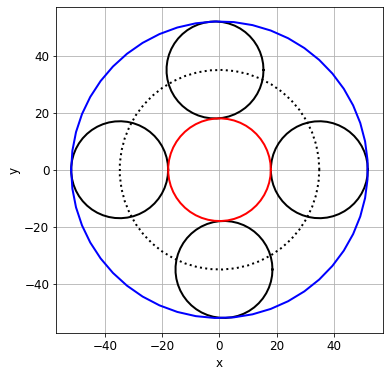

PLANET ANGLES: [0.0, 92.571429, 180.0, 272.571429]


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [65]:
# PLOT CANDIDATE
# --------------
candidate_number = 6

# candidate attributes
candidate_row = candidates[candidate_number-1]
candidate = get_candidate_dict(candidate_row)
z1 = candidate['z1']
z3 = candidate['z3']
N = candidate['N']
mn = candidate['mn']
cd = candidate['CD']
carrier_pcd = 2 * cd

# computed attributes
d_w1 = z1 * mn
d_w3 = z3 * mn
d_w2 = reference_planet_size(d_w1, d_w3)

# define tabular data
df_candidate = pd.DataFrame(data=[candidate_row], columns=cols_candidate)
df_candidate = df_candidate.set_index('#')

# define table display
grid_options = {'minVisibleRows': 1, 'maxVisibleRows': 1, 'sortable': False, 'filterable': False}
qgridwidget = qgrid.show_grid(df_candidate, grid_options=grid_options)

# initialize plot
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(1, 1, 1)

# carrier pitch circle
x, y = planetary.circle_curve(carrier_pcd / 2)
ax.plot(x, y, 'k:', linewidth=2)

# planet spacing
tick_angle = get_planet_tick_angle(z1, z3)
equal_ticks = get_planet_equal_ticks(z1, z3, N)  # k
equal_angle = 2 * pi / number_of_planets
is_dia_opp = is_candidate_diametrally_opposed(candidate)

if is_dia_opp:
    theta1 = 0
    theta2 = equal_angle + tick_angle / 2
    planet_angles = [theta1, theta2, theta1 + pi, theta2 + pi]
else:
    planet_angles = [equal_angle * i for i in range(number_of_planets)]

# planet pitch diameters
for i in range(number_of_planets):
    xc, yc = planetary.polar_to_cartesian(cd, planet_angles[i])
    x, y = planetary.circle_curve(d_w2 / 2, x_center=xc, y_center=yc)
    ax.plot(x, y, 'k', linewidth=2)
    
# ring pitch diameter
x, y = planetary.circle_curve(d_w3 / 2)
ax.plot(x, y, 'b', linewidth=2)

# sun pitch diameter
x, y = planetary.circle_curve(d_w1 / 2)
ax.plot(x, y, 'r', linewidth=2)

# plot format
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# display planet angles
print('PLANET ANGLES:', [round(degrees(theta), 6) for theta in planet_angles])

# display candidate table
qgridwidget

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Helical Standard Planetary<a name="Standard-Example-2"></a></h3>
    <h4>GIVEN</h4>
    <ol>
        <li>Target tranmission ratio, with +/- range.</li>
        <li>Target ring gear size.</li>
        <li>Target planet count.</li>
    </ol>
    <h4>FIND</h4>Helical standard planetary designs that satisfy the input constraints.
    <h4>SOLUTION</h4>See below.
</div>

In [66]:
# TODO solution for helical standard planetary

## Compound Planetary

This section reviews the design layout of compound planetary geartrains with a sun, ring, and planet shafts each with two planet gears.  Reference the image below.  Working examples are provided for spur and helical planetary geartrains.

*TODO compound planetary image*

<img src="./img/drivetrainhub_compound_planetary_helical_gears.png" alt="Compound planetary geartrain" style="max-height: 350px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Compound planetary modeled with <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Spur Compound Planetary<a name="Compound-Example-1"></a></h3>
    <h4>GIVEN</h4>
    <ol>
        <li>Target tranmission ratio, with +/- range.</li>
        <li>Target ring gear size.</li>
        <li>Target planet count.</li>
    </ol>
    <h4>FIND</h4>Spur compound planetary designs that satisfy the input constraints.
    <h4>SOLUTION</h4>See below.
</div>

In [67]:
# TODO solution for spur compound planetary

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Helical Compound Planetary<a name="Compound-Example-2"></a></h3>
    <h4>GIVEN</h4>
    <ol>
        <li>Target tranmission ratio, with +/- range.</li>
        <li>Target ring gear size.</li>
        <li>Target planet count.</li>
    </ol>
    <h4>FIND</h4>Helical compound planetary designs that satisfy the input constraints.
    <h4>SOLUTION</h4>See below.
</div>

In [68]:
# TODO solution for helical compound planetary

---
<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Model Gears</h3><br>
    <a href="https://drivetrainhub.com/gears" style="font-weight: bold">Gears App</a> software is used to accurately model, analyze, and build planetary geartrains entirely in your <u>web browser</u>.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Learn More</h3><br>
    <a href="https://drivetrainhub.com/notebooks/" style="font-weight: bold">Notebook Series</a> is free to learn and contribute knowledge about gears, such as geometry, manufacturing, strength, and more.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Edit Notebook</h3><br>
    <a href="https://github.com/drivetrainhub/notebooks/" style="font-weight: bold">GitHub repos</a> are used to publicly host our notebooks, allowing anyone to view and propose edits.
</div>

## References

1. [Gears and Gear Drives, 1st Edition. Damir Jelaska](https://www.wiley.com/en-us/Gears+and+Gear+Drives-p-9781119941309)
1. Handbook of Practical Gear Design and Manufacture, 1st Edition. Darle W. Dudley